In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [36]:
covid = pd.read_excel(r'C:\Users\karti\OneDrive\Desktop\Analytics work\Brazilcovid.xlsx')

In [37]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


In [38]:
covid.columns

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       ...
       'Hb saturation (arterial blood gases)',
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)'],
      dtype='object', length=111)

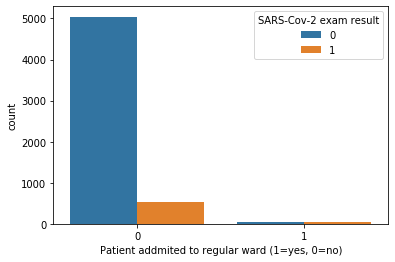

In [60]:
sns.countplot(x='Patient addmited to regular ward (1=yes, 0=no)',hue='SARS-Cov-2 exam result',data=covid)

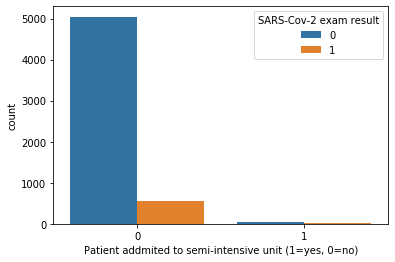

In [61]:
sns.countplot(x='Patient addmited to semi-intensive unit (1=yes, 0=no)',hue='SARS-Cov-2 exam result',data=covid)

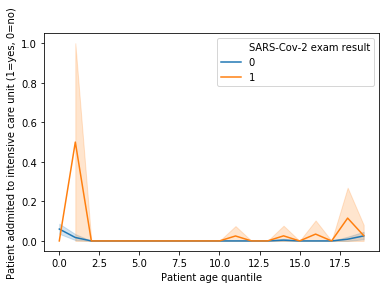

In [63]:
sns.lineplot(x='Patient age quantile',y='Patient addmited to intensive care unit (1=yes, 0=no)',hue='SARS-Cov-2 exam result',data=covid)

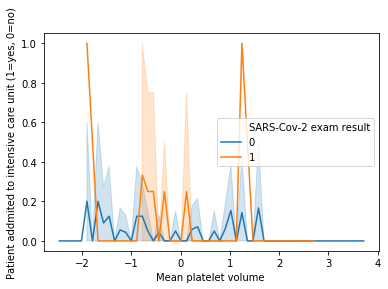

In [65]:
sns.lineplot(x='Mean platelet volume ',y='Patient addmited to intensive care unit (1=yes, 0=no)',hue='SARS-Cov-2 exam result',data=covid)

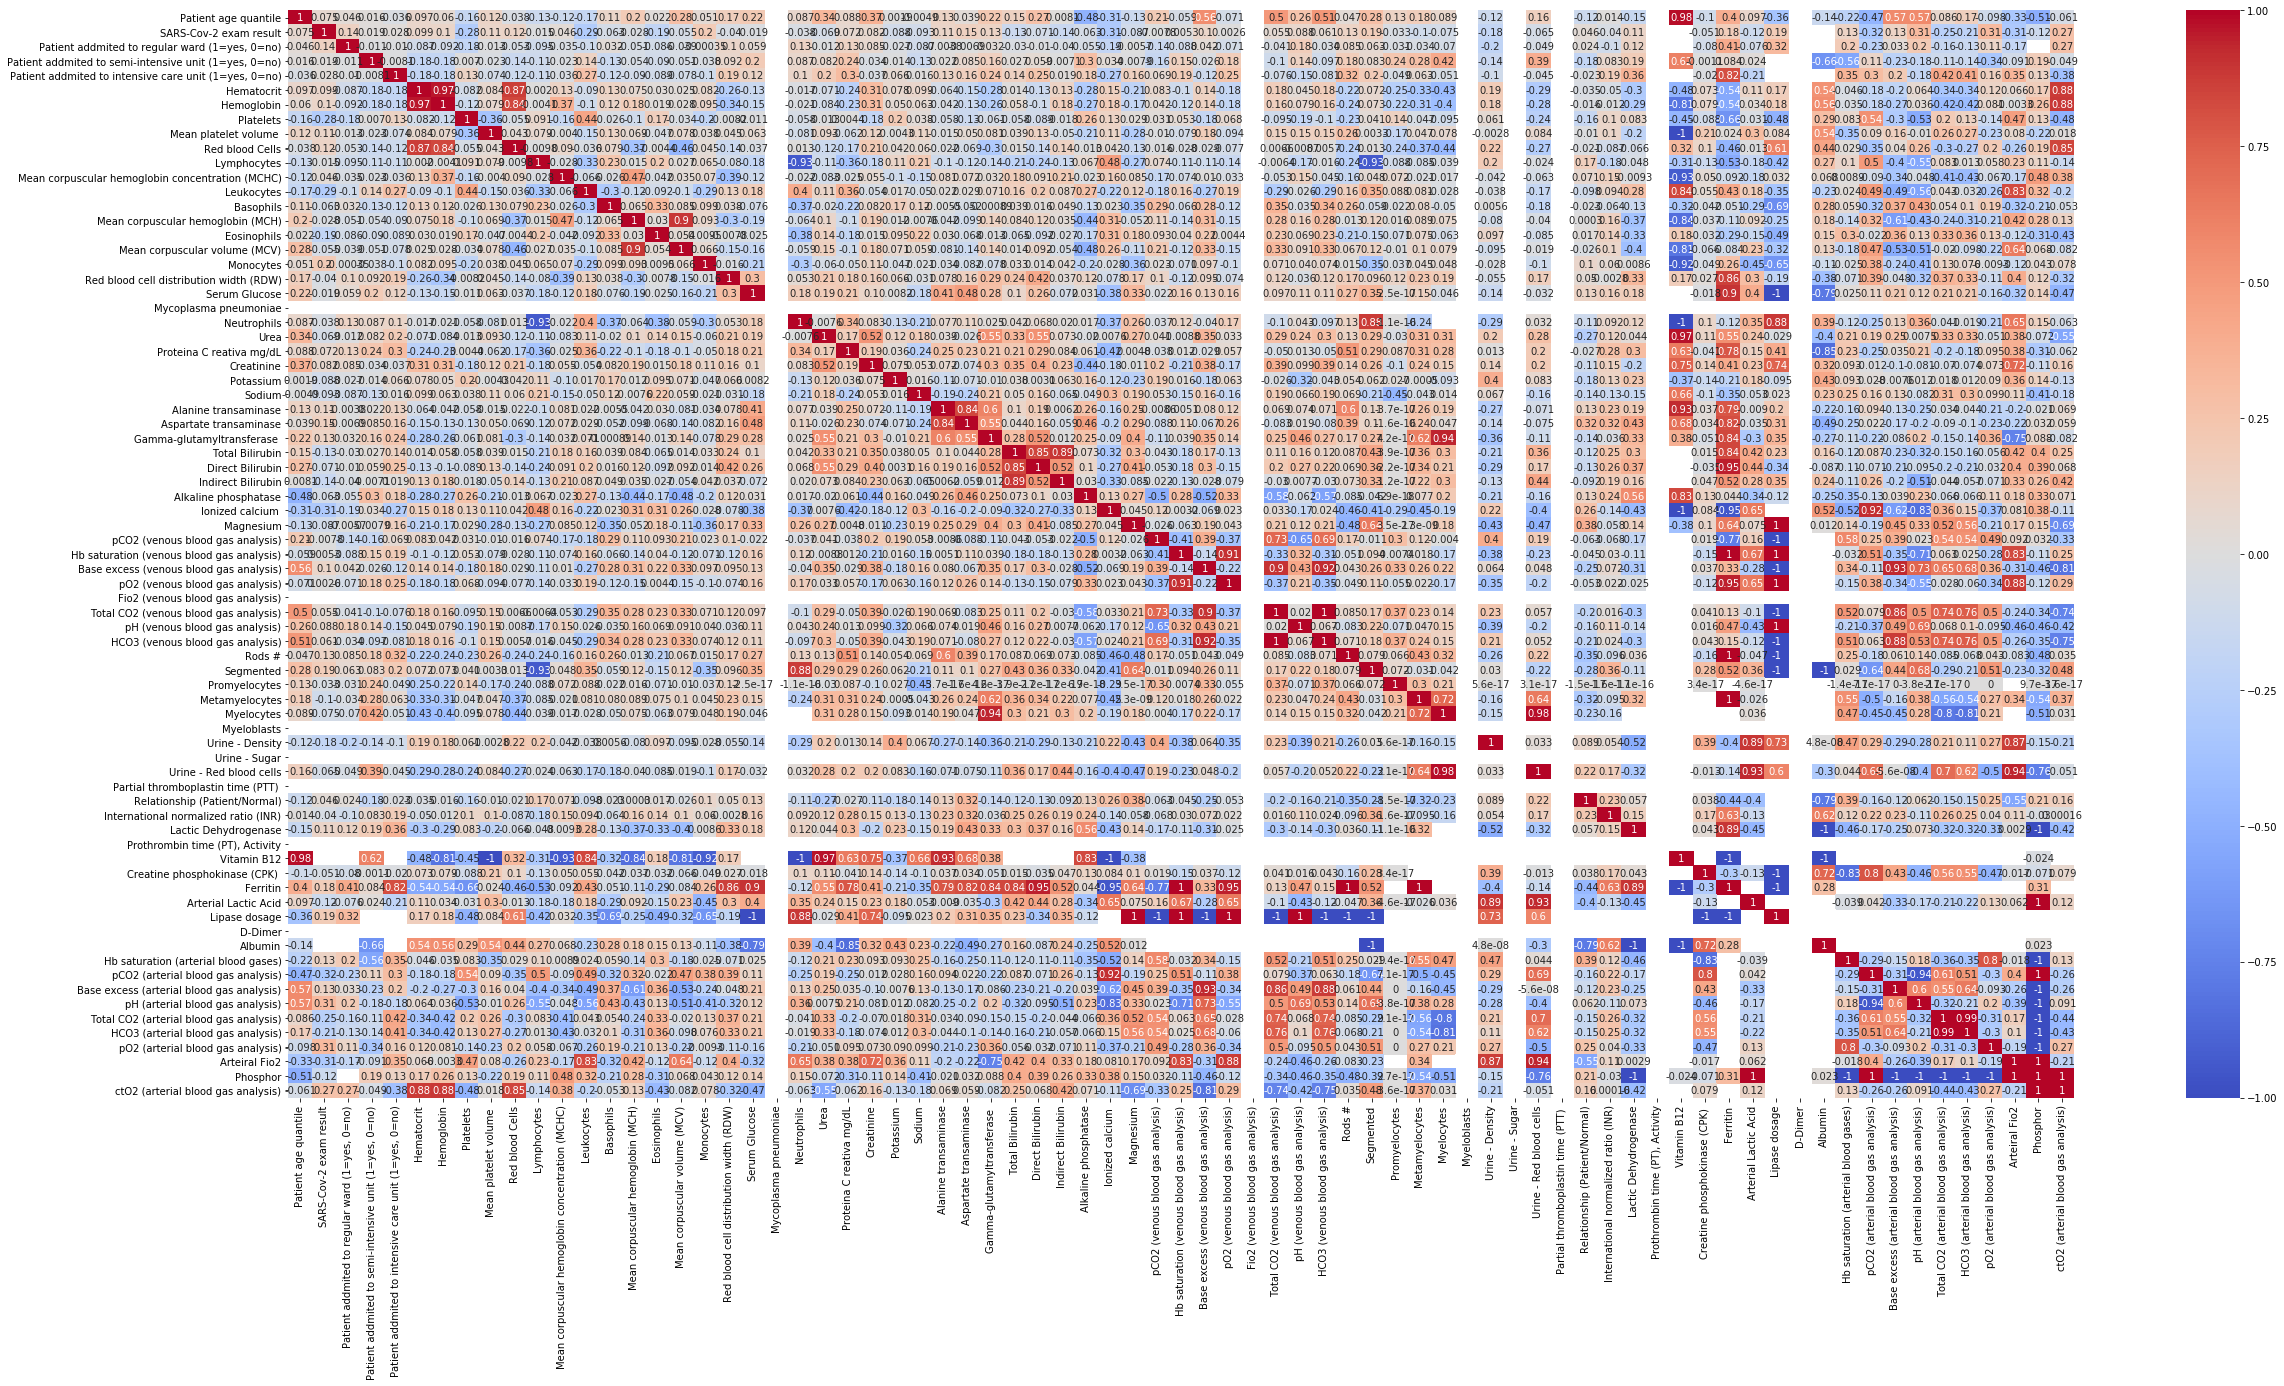

In [57]:
plt.figure(figsize=(40,20))
sns.heatmap(covid.corr(),cmap='coolwarm',annot=True)

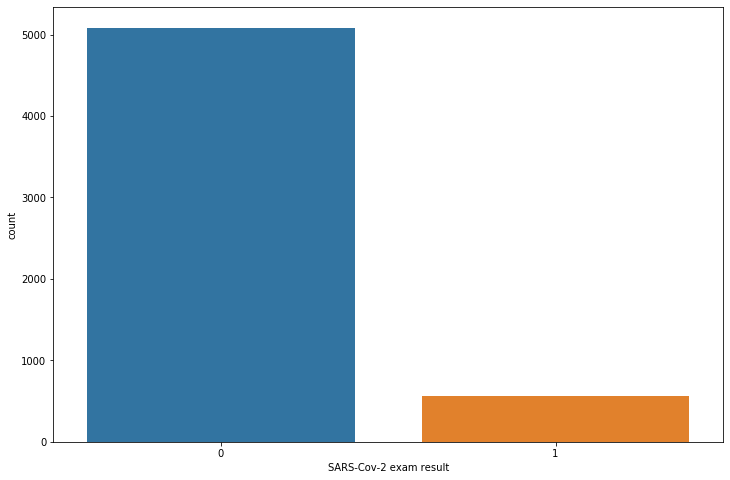

In [40]:
plt.figure(figsize=(12,8))
covid['SARS-Cov-2 exam result'] = covid['SARS-Cov-2 exam result'].replace(['negative','positive'], [0,1])
sns.countplot(covid['SARS-Cov-2 exam result'])

In [41]:
def missing_data(covid):
    total = covid.isnull().sum()
    percent = (covid.isnull().sum()/covid.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in covid.columns:
        dtype = str(covid[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

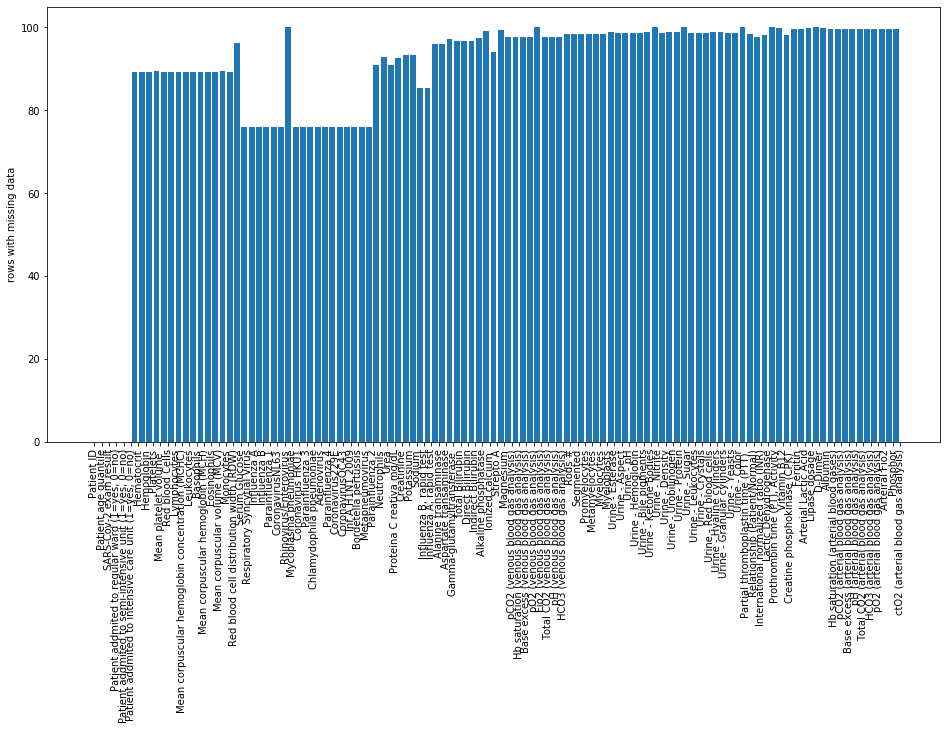

In [43]:
null_perc = covid.isnull().sum()*100/len(covid)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_perc))+0.5,null_perc.index,rotation='vertical')
plt.ylabel('rows with missing data')
plt.bar(np.arange(len(null_perc)),null_perc)
plt.show()

In [44]:
len(covid[covid['SARS-Cov-2 exam result'] == 1])

558

In [45]:
len(covid[covid['SARS-Cov-2 exam result'] == 0])

5086

In [48]:
goodcols = data_null[data_null==0].reset_index()
goodcols

,index,0
0,Patient ID,0
1,Patient age quantile,0
2,SARS-Cov-2 exam result,0
3,"Patient addmited to regular ward (1=yes, 0=no)",0
4,Patient addmited to semi-intensive unit (1=yes...,0
5,Patient addmited to intensive care unit (1=yes...,0


In [49]:
DF=df[good_columns['index']]
DF.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)"
0,44477f75e8169d2,13,0,0,0,0
1,126e9dd13932f68,17,0,0,0,0
2,a46b4402a0e5696,8,0,0,0,0
3,f7d619a94f97c45,5,0,0,0,0
4,d9e41465789c2b5,15,0,0,0,0


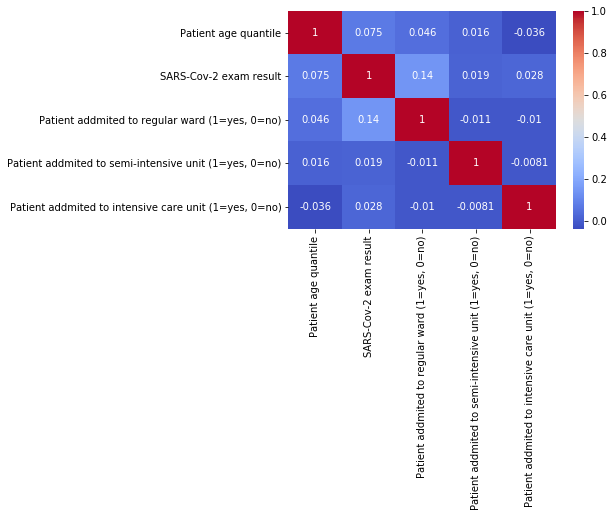

In [50]:
sns.heatmap(DF.corr(), annot=True,cmap='coolwarm')

In [51]:
X=DF.drop(["Patient ID",], axis=1)
y=DF['SARS-Cov-2 exam result']

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [54]:
LR=LogisticRegression()
LR.fit(X_train,y_train)
LR.score(X_train,y_train)
predlr=LR.predict(X_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

1.0
[[1536    0]
 [   0  158]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1536
           1       1.00      1.00      1.00       158

    accuracy                           1.00      1694
   macro avg       1.00      1.00      1.00      1694
weighted avg       1.00      1.00      1.00      1694



In [55]:
SV=SVC()
SV.fit(X_train,y_train)
SV.score(X_train,y_train)
predsv=SV.predict(X_test)
print(accuracy_score(y_test,predsv))
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

1.0
[[1536    0]
 [   0  158]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1536
           1       1.00      1.00      1.00       158

    accuracy                           1.00      1694
   macro avg       1.00      1.00      1.00      1694
weighted avg       1.00      1.00      1.00      1694



In [56]:
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)
DT.score(X_train,y_train)
preddt=DT.predict(X_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

1.0
[[1536    0]
 [   0  158]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1536
           1       1.00      1.00      1.00       158

    accuracy                           1.00      1694
   macro avg       1.00      1.00      1.00      1694
weighted avg       1.00      1.00      1.00      1694



# Removing the columns with more tha 85 percent null values has cleaned the data and allowed us to choose on few features which has resulted in high accuracy for all the classification algorythms